In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import evaluation.evaluator as evaluator
from importlib import reload

reload(evaluator)

<module 'evaluation.evaluator' from 'C:\\TU_Wien\\2_Master\\ML\\exercise-1\\evaluation\\evaluator.py'>

In [3]:
path = "./datasets_kaggle/breast-cancer/"
train_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.lrn.csv" % path)
competition_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.tes.csv" % path)

train_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)
competition_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)

train_data.drop(columns=['ID'], inplace=True)
competition_data.drop(columns=['ID'], inplace=True)

In [4]:
train_data

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [5]:
competition_data

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [6]:
y = train_data[('class')]
X = train_data.drop('class', axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# y_comp = competition_data['grade']  # Target variable does not exist for competition data
X_comp = competition_data
print(X_train.dtypes)

radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst            float64
 concavePointsWorst        float64
 symmetryWorst      

In [7]:
print("null values in train data: " + str(X_train.isnull().sum().sum()))
print("null values in test data: " + str(X_test.isnull().sum().sum()))
print("null values in competition data: " + str(X_comp.isnull().sum().sum()))

null values in train data: 0
null values in test data: 0
null values in competition data: 0


In [8]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    #('scaler', StandardScaler())
])

# Preprocess training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_comp = pipeline.transform(X_comp)

In [9]:
# Encode target variable
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    #'alpha': 1e-4,
    'hidden_layer_sizes': (25, 25, 25),
    'random_state': 7895,
    'max_iter': 3000,
    'verbose': False,
    'tol': 5e-5
}
evaluator.evaluate(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                   hyperparameter_iterate='alpha', hyperparameter_iterations=[1e-3, 1e-4, 1e-5])

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'hidden_layer_sizes': (25, 25, 25), 'random_state': 7895, 'max_iter': 3000, 'verbose': False, 'tol': 5e-05}
Hyperparameter  alpha  value:  0.001
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9652663191989034
F1:  0.9651006853533873
Time: 339.634418ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  alpha  value:  0.0001
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 304.983616ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  alpha  value:  1e-05
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 304.568529ms
Confusion Matrix: 
+----+-----+

In [48]:
reload(evaluator)
hyperparameters_iterator = {'alpha': np.logspace(-5, 0, num=20)}
test = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
test

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'alpha': 0.0001, 'random_state': 7895, 'max_iter': 3000, 'verbose': False, 'tol': 5e-05}
Hyperparameter  alpha  value:  1e-05
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 1168.811798ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  alpha  value:  1.8329807108324375e-05
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 848.408699ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  alpha  value:  3.359818286283781e-05
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 811.288834ms
Confusion Mat

{'alpha:1e-05': {'accuracy': 0.965034965034965,
  'recall': 0.965034965034965,
  'precision': 0.9649965419196188,
  'f1': 0.9649650533628434,
  'time': 1168.8117980957031,
  'confusion_matrix':     0   1
  0  88   2
  1   3  50,
  'alpha': 1e-05},
 'alpha:1.8329807108324375e-05': {'accuracy': 0.965034965034965,
  'recall': 0.965034965034965,
  'precision': 0.9649965419196188,
  'f1': 0.9649650533628434,
  'time': 848.4086990356445,
  'confusion_matrix':     0   1
  0  88   2
  1   3  50,
  'alpha': 1.8329807108324375e-05},
 'alpha:3.359818286283781e-05': {'accuracy': 0.965034965034965,
  'recall': 0.965034965034965,
  'precision': 0.9649965419196188,
  'f1': 0.9649650533628434,
  'time': 811.2888336181641,
  'confusion_matrix':     0   1
  0  88   2
  1   3  50,
  'alpha': 3.359818286283781e-05},
 'alpha:6.158482110660267e-05': {'accuracy': 0.965034965034965,
  'recall': 0.965034965034965,
  'precision': 0.9649965419196188,
  'f1': 0.9649650533628434,
  'time': 816.2522315979004,
  'co

In [12]:
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'alpha': 1e-4,
    #'hidden_layer_sizes': (25, 25, 25),
    'random_state': 7895,
    'max_iter': 3000,
    'verbose': False,
    'tol': 5e-5
}
evaluator.evaluate(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                   hyperparameter_iterate='hidden_layer_sizes',
                   hyperparameter_iterations=[(1, 1, 1), (10, 10, 10), (25, 25, 25), (50, 50, 50)])

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'alpha': 0.0001, 'random_state': 7895, 'max_iter': 3000, 'verbose': False, 'tol': 5e-05}
Hyperparameter  hidden_layer_sizes  value:  (1, 1, 1)
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 57.033777ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (10, 10, 10)
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9513312322301086
F1:  0.9511409594947421
Time: 381.177425ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  86 |   4 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (25, 25, 25)
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 40

In [13]:
evaluator.evaluate(GaussianNB, X_train, y_train, X_test, y_test)

Evaluating classifier:  GaussianNB
Hyperparameters:  {}
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9722098021330758
F1:  0.9719127026819333
Time: 0.997782ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   3 |  50 |
+----+-----+-----+


In [14]:
evaluator.evaluate(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters={'random_state': 42},
                   hyperparameter_iterate='n_estimators', hyperparameter_iterations=[10, 50, 100, 200, 500, 1000])

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'random_state': 42}
Hyperparameter  n_estimators  value:  10
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9513376945635011
F1:  0.9507373098014511
Time: 19.982815ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   5 |  48 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  50
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.958041958041958
F1:  0.958041958041958
Time: 61.656713ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  100
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 129.488707ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyper

<Figure size 1000x600 with 0 Axes>

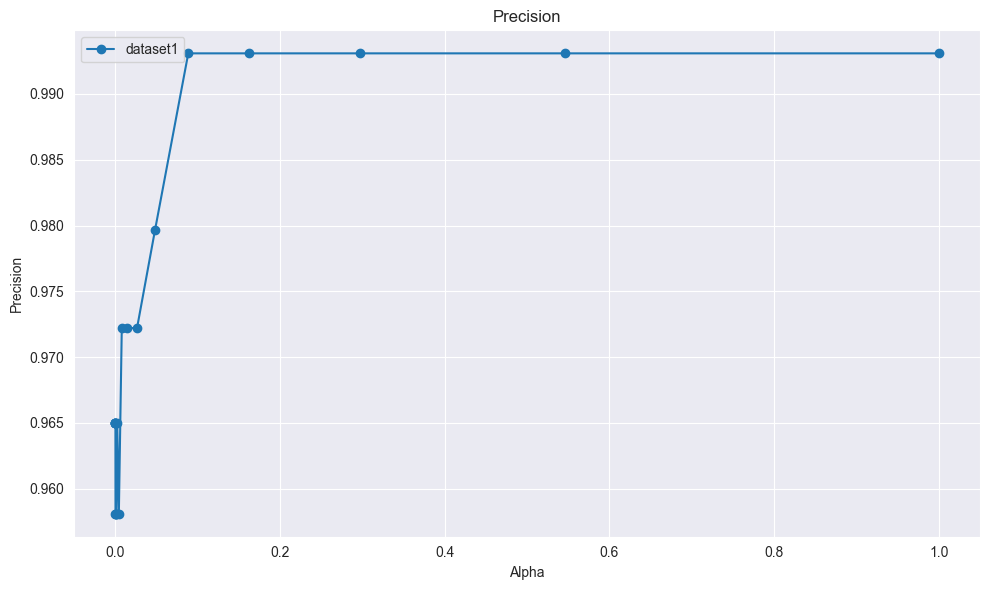

<Figure size 1000x600 with 0 Axes>

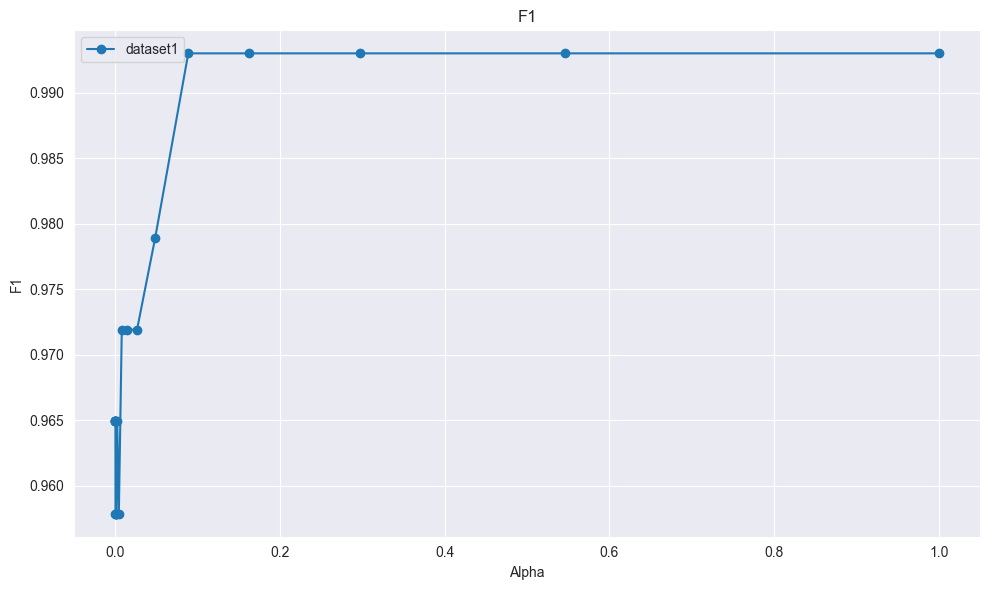

<Figure size 1000x600 with 0 Axes>

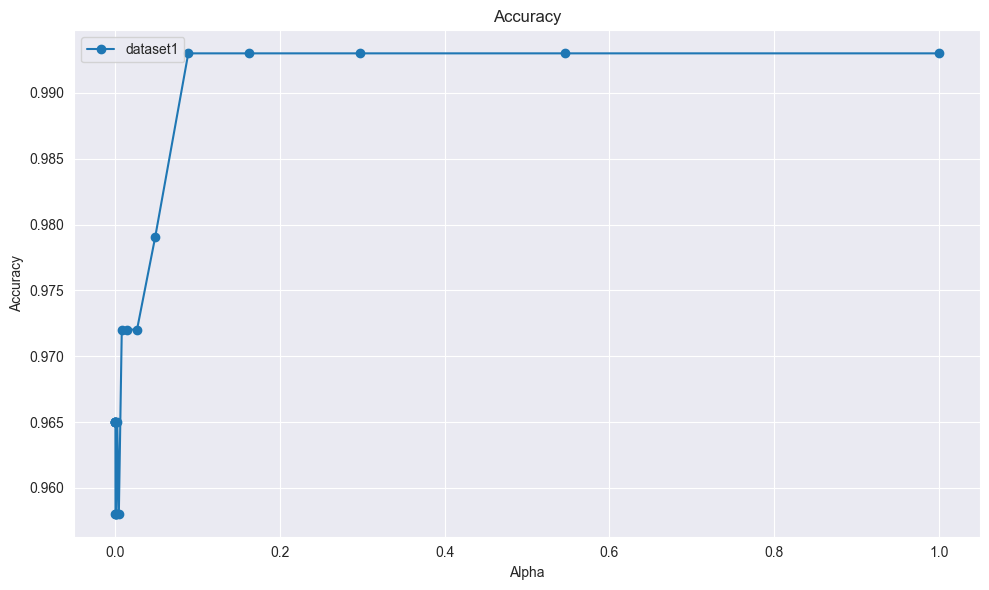

<Figure size 1000x600 with 0 Axes>

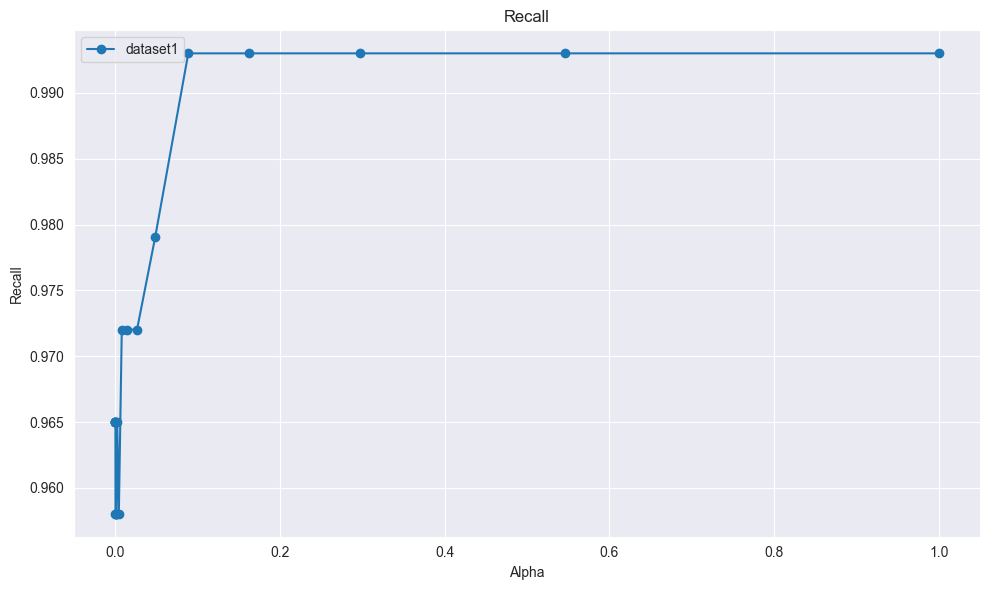

<Figure size 1000x600 with 0 Axes>

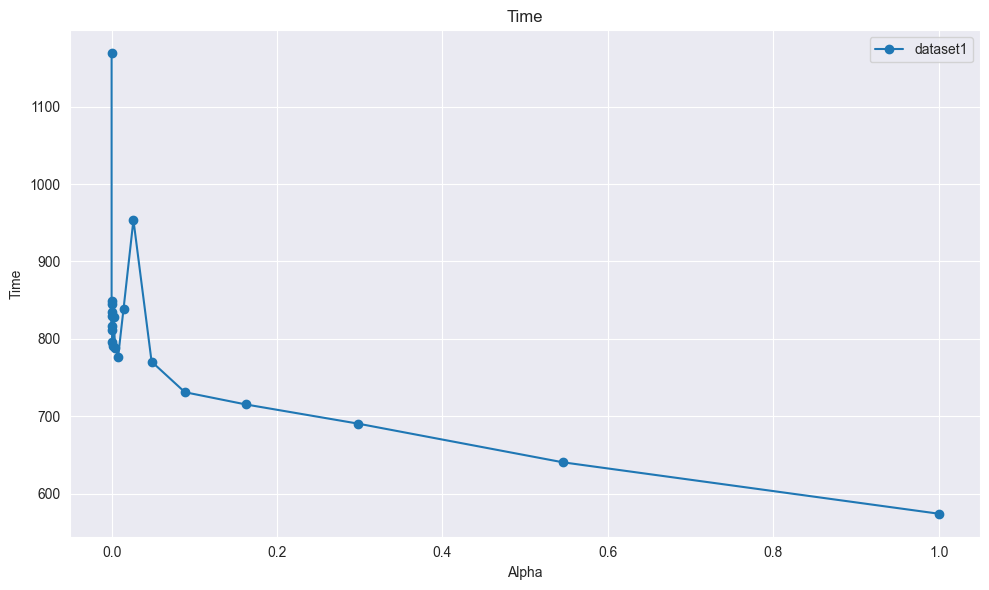

In [49]:
reload(evaluator)
data_sets = {
    'dataset_1': {
        'alpha:0.001': {'accuracy': 0.965034965034965, 'recall': 0.965034965034965, 'precision': 0.9652663191989034,
                        'f1': 0.9651006853533873, 'time': 280.17568588256836, 'confusion_matrix': [[87, 3], [2, 51]],
                        'alpha': 0.001},
        'alpha:0.0001': {'accuracy': 0.972027972027972, 'recall': 0.972027972027972, 'precision': 0.972027972027972,
                         'f1': 0.972027972027972, 'time': 339.1234874725342, 'confusion_matrix': [[88, 2], [2, 51]],
                         'alpha': 0.0001},
        'alpha:1e-05': {'accuracy': 0.972027972027972, 'recall': 0.972027972027972, 'precision': 0.972027972027972,
                        'f1': 0.972027972027972, 'time': 341.6876792907715, 'confusion_matrix': [[88, 2], [2, 51]],
                        'alpha': 1e-05}
    },
    'dataset_2': {
        'alpha:0.001': {'accuracy': 0.955, 'recall': 0.955, 'precision': 0.955, 'f1': 0.955, 'time': 300.175,
                        'confusion_matrix': [[86, 4], [3, 50]], 'alpha': 0.001},
        'alpha:0.0001': {'accuracy': 0.962, 'recall': 0.962, 'precision': 0.962, 'f1': 0.962, 'time': 320.123,
                         'confusion_matrix': [[87, 3], [3, 50]], 'alpha': 0.0001},
        'alpha:1e-05': {'accuracy': 0.968, 'recall': 0.968, 'precision': 0.968, 'f1': 0.968, 'time': 340.456,
                        'confusion_matrix': [[88, 2], [4, 49]], 'alpha': 1e-05}
    },
    'dataset_3': {
        'alpha:0.001': {'accuracy': 0.755, 'recall': 0.855, 'precision': 0.855, 'f1': 0.955, 'time': 300.175,
                        'confusion_matrix': [[86, 4], [3, 50]], 'alpha': 0.001},
        'alpha:0.0001': {'accuracy': 0.762, 'recall': 0.862, 'precision': 0.862, 'f1': 0.962, 'time': 310.123,
                         'confusion_matrix': [[87, 3], [3, 50]], 'alpha': 0.0001},
        'alpha:1e-05': {'accuracy': 0.768, 'recall': 0.868, 'precision': 0.868, 'f1': 0.968, 'time': 340.456,
                        'confusion_matrix': [[88, 2], [4, 49]], 'alpha': 1e-05}
    },
    'Steve': {
        'alpha:0.001': {'accuracy': 0.755, 'recall': 0.855, 'precision': 0.755, 'f1': 0.955, 'time': 300.175,
                        'confusion_matrix': [[86, 4], [3, 50]], 'alpha': 0.001},
        'alpha:0.0001': {'accuracy': 0.762, 'recall': 0.862, 'precision': 0.72, 'f1': 0.962, 'time': 310.123,
                         'confusion_matrix': [[87, 3], [3, 50]], 'alpha': 0.0001},
        'alpha:1e-05': {'accuracy': 0.768, 'recall': 0.868, 'precision': 0.878, 'f1': 0.968, 'time': 340.456,
                        'confusion_matrix': [[88, 2], [4, 49]], 'alpha': 1e-05}
    }
}

test2 = {'dataset1': test}
evaluator.draw_diagrams(test2)